# Compare error metrics:


In [1]:
version = '7'

In [2]:
# Load auxiliar functions and configurations
filename = 'utils_v{}.ipynb'.format(version)
%run $filename

In [3]:
# Configurations
print('cordex_output_path', cordex_output_path)
print('surfex_output_path', surfex_output_path)
print('temp_output_path', temp_output_path)
print('plots_output_path', plots_output_path)
print('models_markers', models_markers)
print('metrics_fn', metrics_fn)
print('temp_obs_col', temp_obs_col)
print('models_cols', models_cols)
print('ens_beta_col', ens_beta_col)
print(METRIC_NAMES, SEASONS)

cordex_output_path ..\data\cordex\output
surfex_output_path ..\data\surfex\output
temp_output_path ..\data\observations\temp\output
plots_output_path ..\plots\output
models_markers {0: ('CNRMCM5_ALADIN', '*'), 1: ('CNRMCM5_HIRHAM', '*'), 2: ('CNRMCM5_SMHIRCA', '*'), 3: ('ECEARTH_SMHIRCA', '+'), 4: ('ECEARTH_HIRHAM', '+'), 5: ('IPSLCM5-SMHIRCA', 'd'), 6: ('HADGEM_REGCM', '1'), 7: ('HADGEM_SMHIRCA', '1'), 8: ('MPIESM_COSMO', 'o'), 9: ('MPIESM_HIRHAM', 'o'), 10: ('MPIESM_REGCM', 'o'), 11: ('MPIESM_SMHIRCA', 'o'), 12: ('MPIESM_REMO', 'o'), 13: ('NORESM_COSMO', '^'), 14: ('NORESM_HIRHAM', '^'), 15: ('NORESM_REMO', '^'), 16: ('NORESM_SMHIRCA', '^'), 18: ('EnsembleBeta', '$B$'), 19: ('EnsembleAlfa', '$A$')}
metrics_fn {'bias': 'bias', 'sigma': 'sigma_score', 'perkins': 'perkins_skill_score', 'yk': 'yk_skewness'}
temp_obs_col 17
models_cols [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
ens_beta_col 18
dict_keys(['bias', 'sigma', 'perkins', 'yk']) dict_keys(['DJF', 'MAM', 'JJA', 'S

### Loading CORDEX data from file - JJA

In [4]:
df_cdx_all_met_ensB_jja = metrics_models_ensemblesBETA('cordex_join_obs_jja.csv', 'JJA',
                                                       cordex_output_path, 'CORDEX',
                                                       models_cols, temp_obs_col, ens_beta_col)

In [5]:
df_cdx_all_met_ensB_jja[0].mean(axis=1)

0     1.806204
1     2.250713
2     2.594981
3     2.280821
4     1.235883
5     2.250514
6     2.854826
7     3.451503
8     1.270635
9     0.615867
10    1.144166
11    0.791389
12    0.317386
13    1.130752
14    0.979890
15   -0.397529
16    0.947861
18    1.501521
dtype: float64

### Loading SURFEX data from file - JJA

In [6]:
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_sfx_all_met_ensB_jja = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_jja.csv', 'JJA',
                                                                     surfex_output_path, 'SURFEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))

In [7]:
df_sfx_all_met_ensB_jja[3]

,0,3,6,9,12,15,18,21
0,0.060422,0.107927,0.158873,0.156788,0.094144,0.108168,0.096529,0.063925
1,0.056757,0.044282,0.026562,0.110714,0.121042,0.134625,0.106493,0.084294
2,0.136376,0.190248,0.204496,0.174590,0.085909,0.109519,0.114976,0.095626
3,0.032949,0.043853,0.121142,0.090826,0.084666,0.094259,0.047668,0.005384
4,0.035726,0.059829,0.045080,0.022856,0.009507,0.068387,0.054778,0.008758
5,0.177488,0.214680,0.233745,0.216391,0.124385,0.129042,0.118148,0.133835
6,0.210399,0.220711,0.234738,0.172770,0.001337,0.023965,0.088170,0.160392
7,0.305701,0.305915,0.325870,0.258439,0.135684,0.159407,0.229234,0.277119
8,0.039076,0.060840,0.040538,0.011723,0.021605,0.009643,0.003872,0.009245
9,0.035172,0.035818,0.011233,0.022771,0.027758,0.055819,0.027171,0.005220


## Models' error metrics
* Error metric relative to the OBSERVATIONS

## Compare Metrics with Ensemble - by hour

### DJF

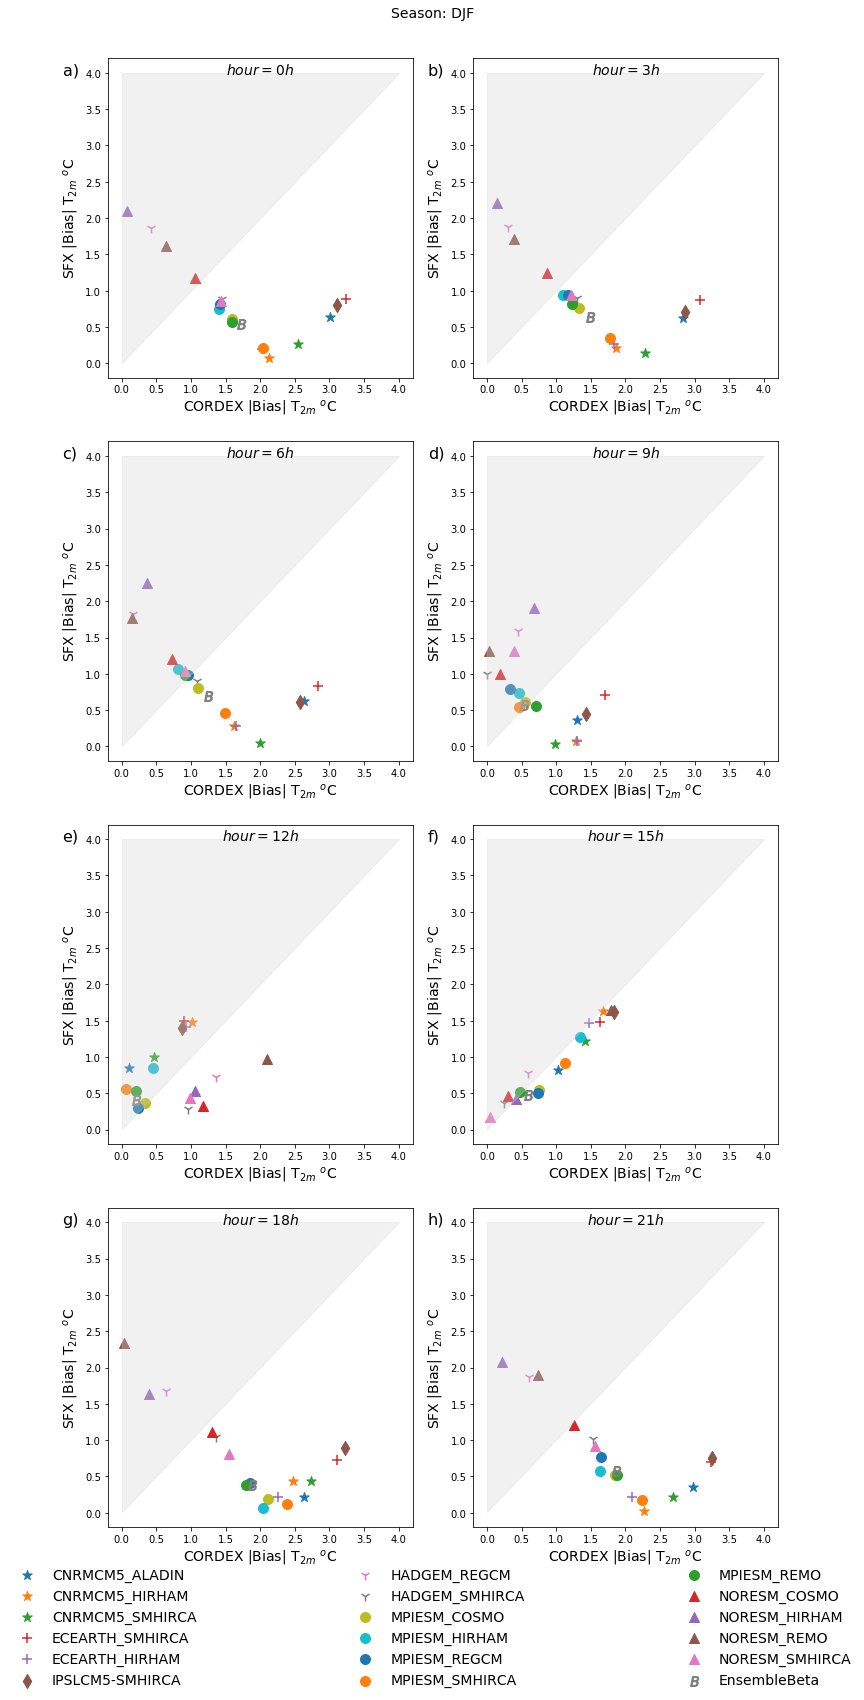

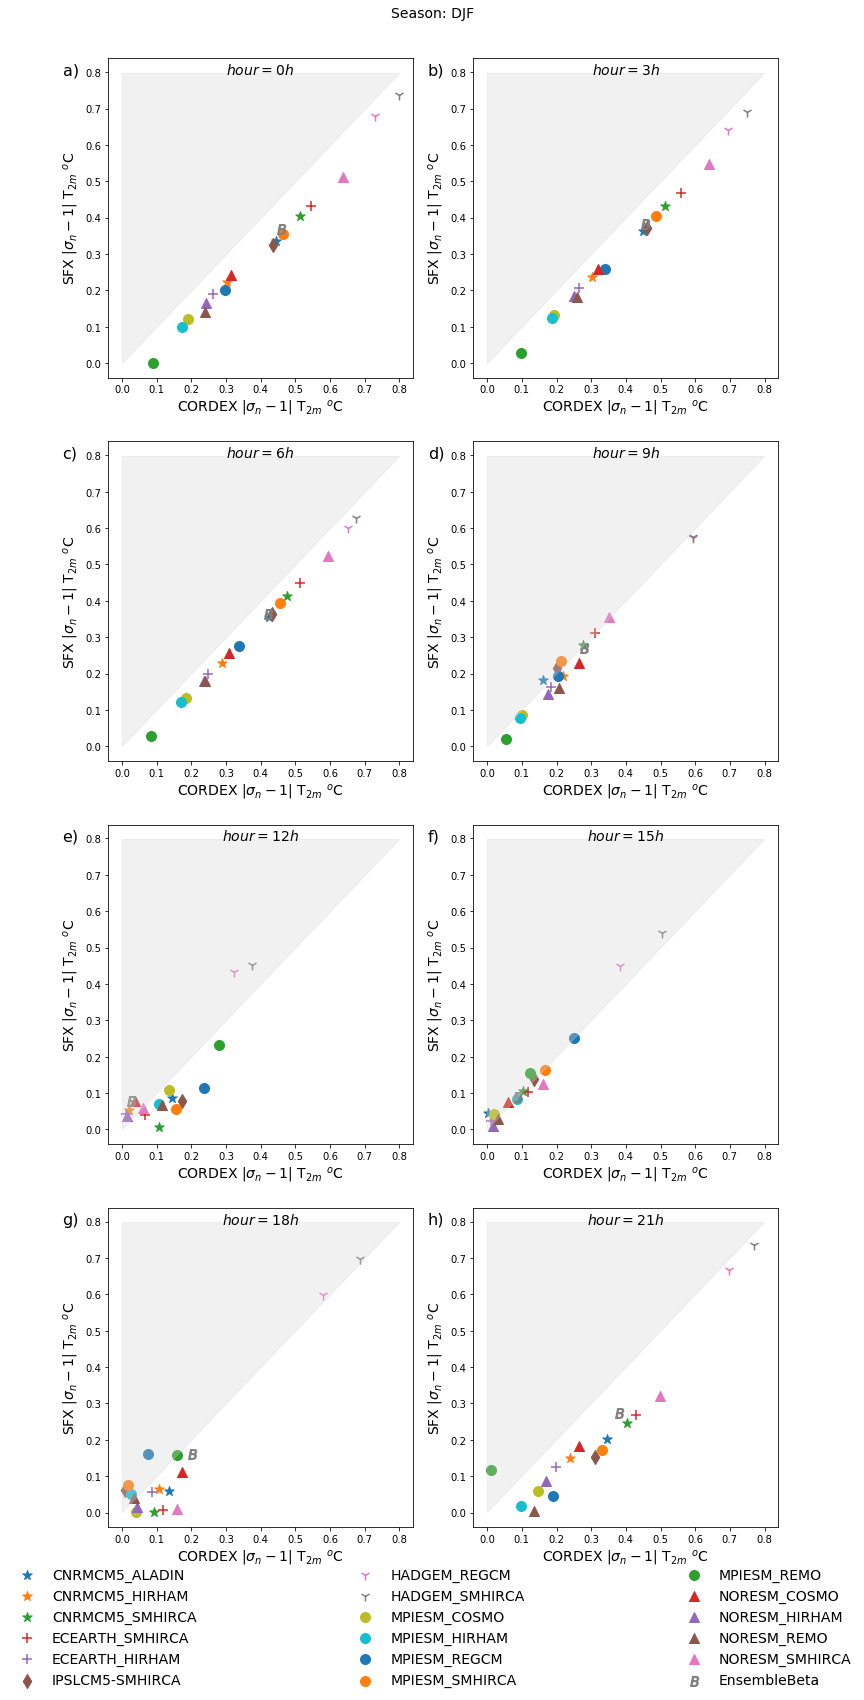

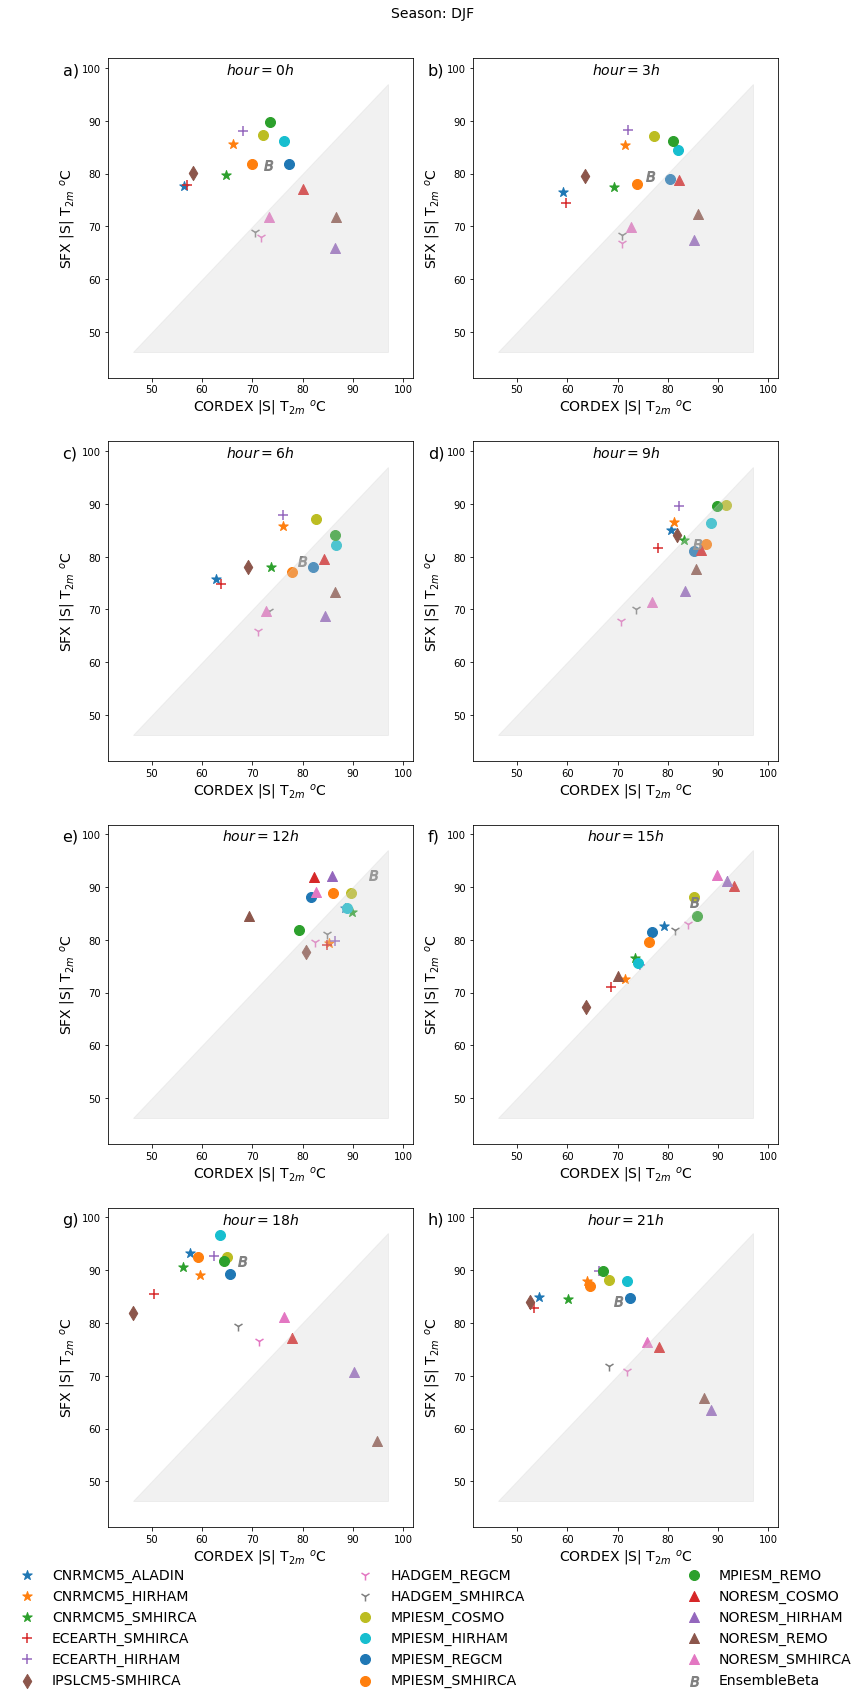

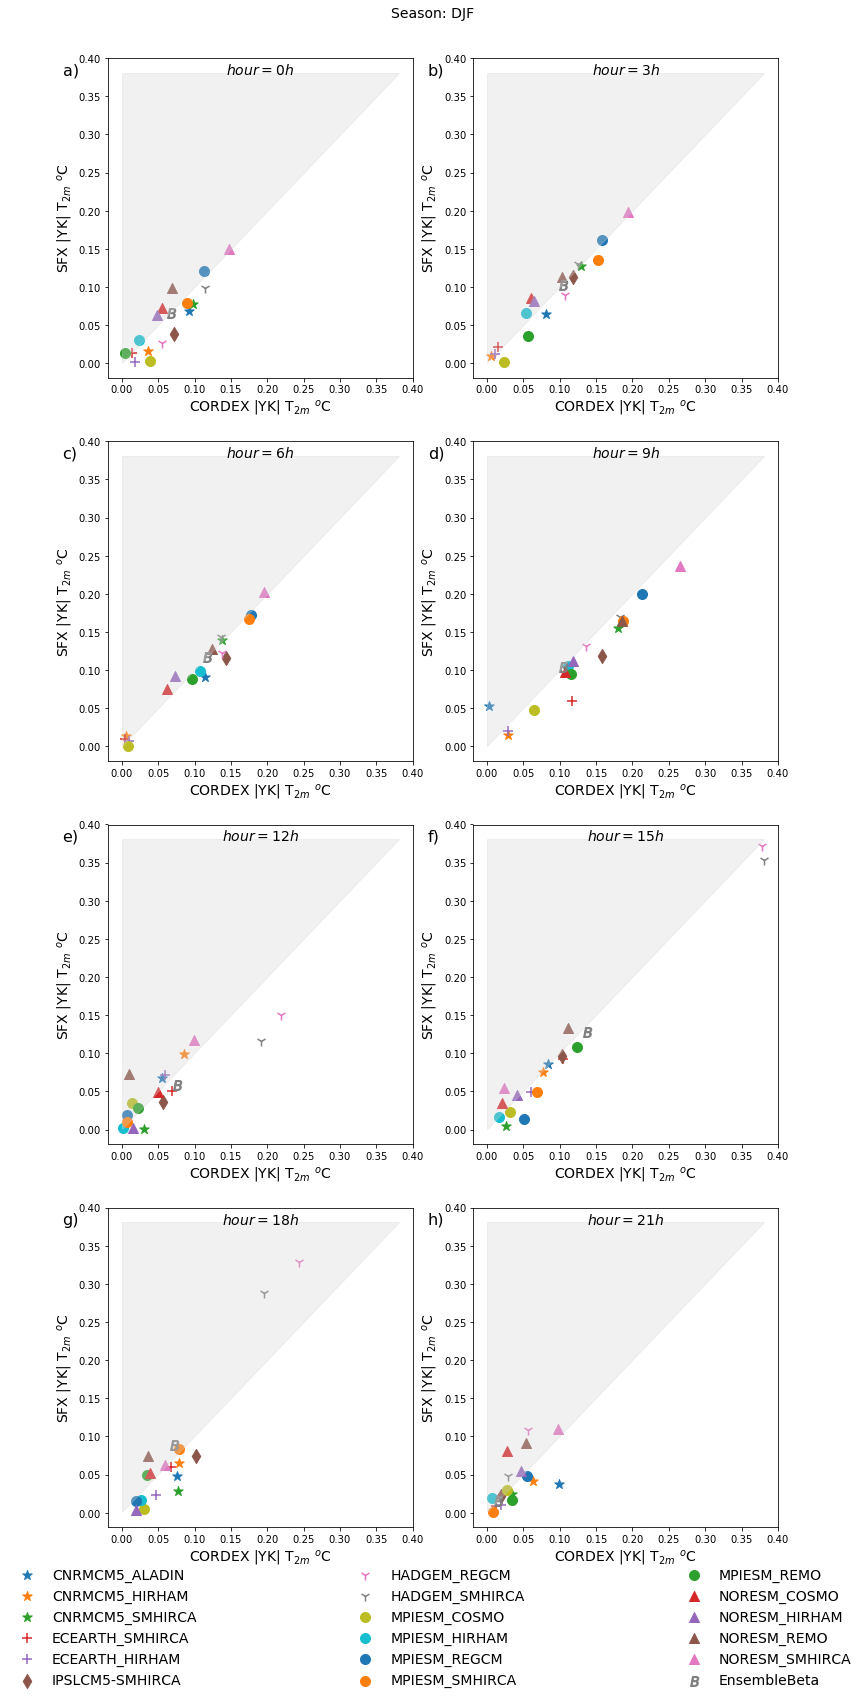

In [8]:
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_cdx_all_met_ensB_djf = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_djf.csv', 'DJF',
                                                                     cordex_output_path, 'CORDEX', 
                                                                     models_cols, temp_obs_col, ens_beta_col)))
df_sfx_all_met_ensB_djf = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_djf.csv', 'DJF',
                                                                     surfex_output_path, 'SURFEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))

for metric,df_met_cdx,df_sfx_met in zip(METRIC_NAMES, df_cdx_all_met_ensB_djf, df_sfx_all_met_ensB_djf):
    plot_cmp_metric(metric, df_met_cdx, df_sfx_met, title_fig='DJF',
                out_filename='{}_cmp_w_ensBETA_djf'.format(metric), sub_folder='metric_ensemble_cmp')

### MAM

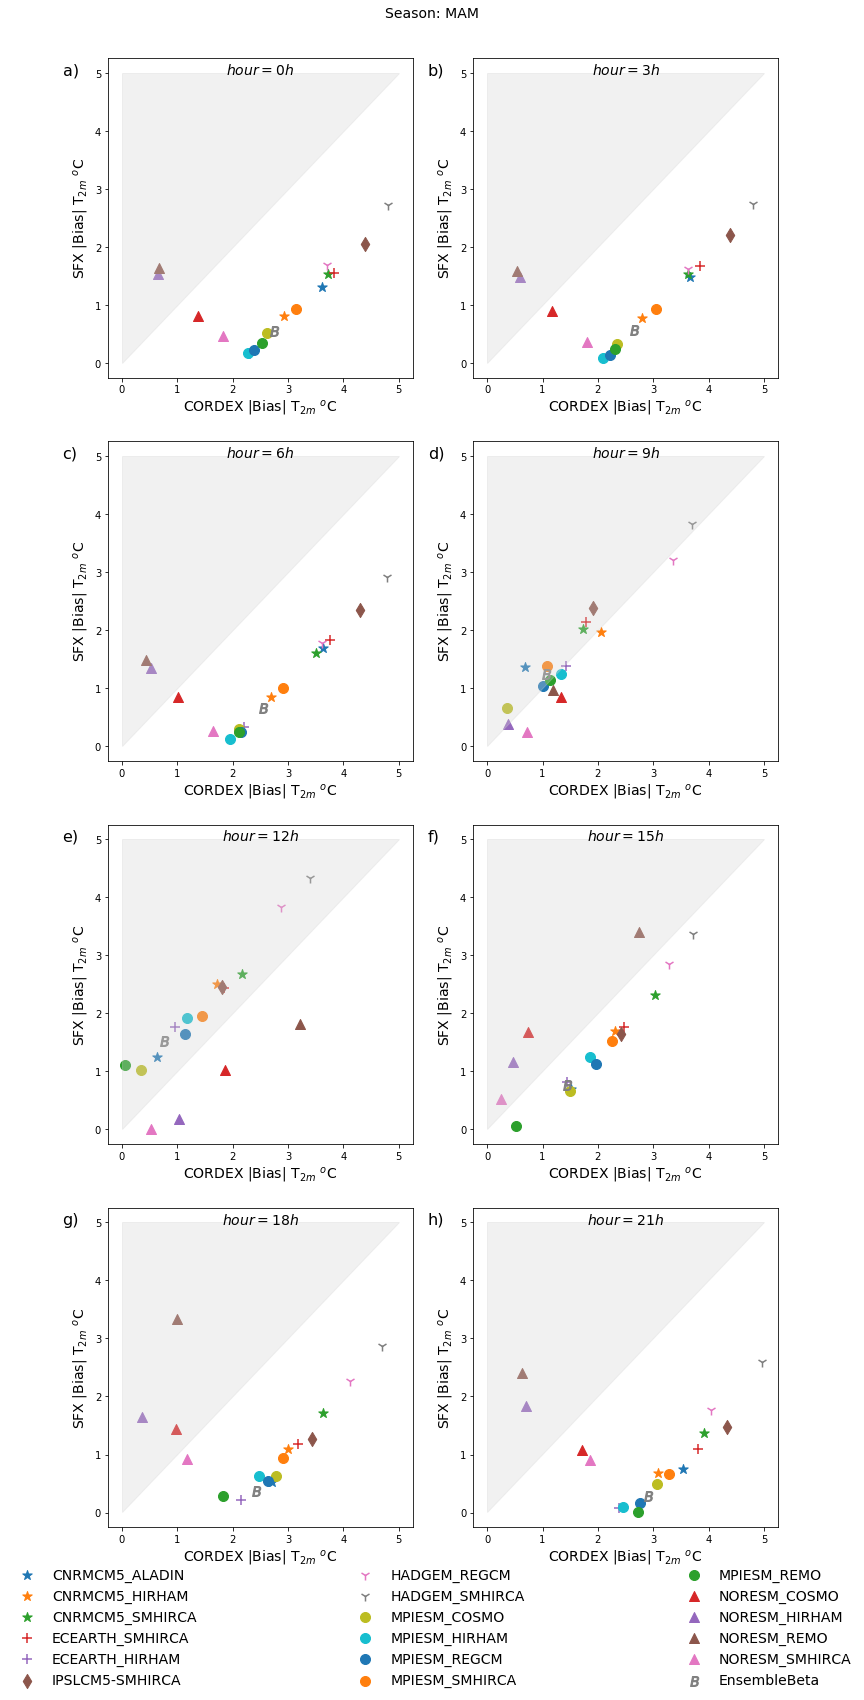

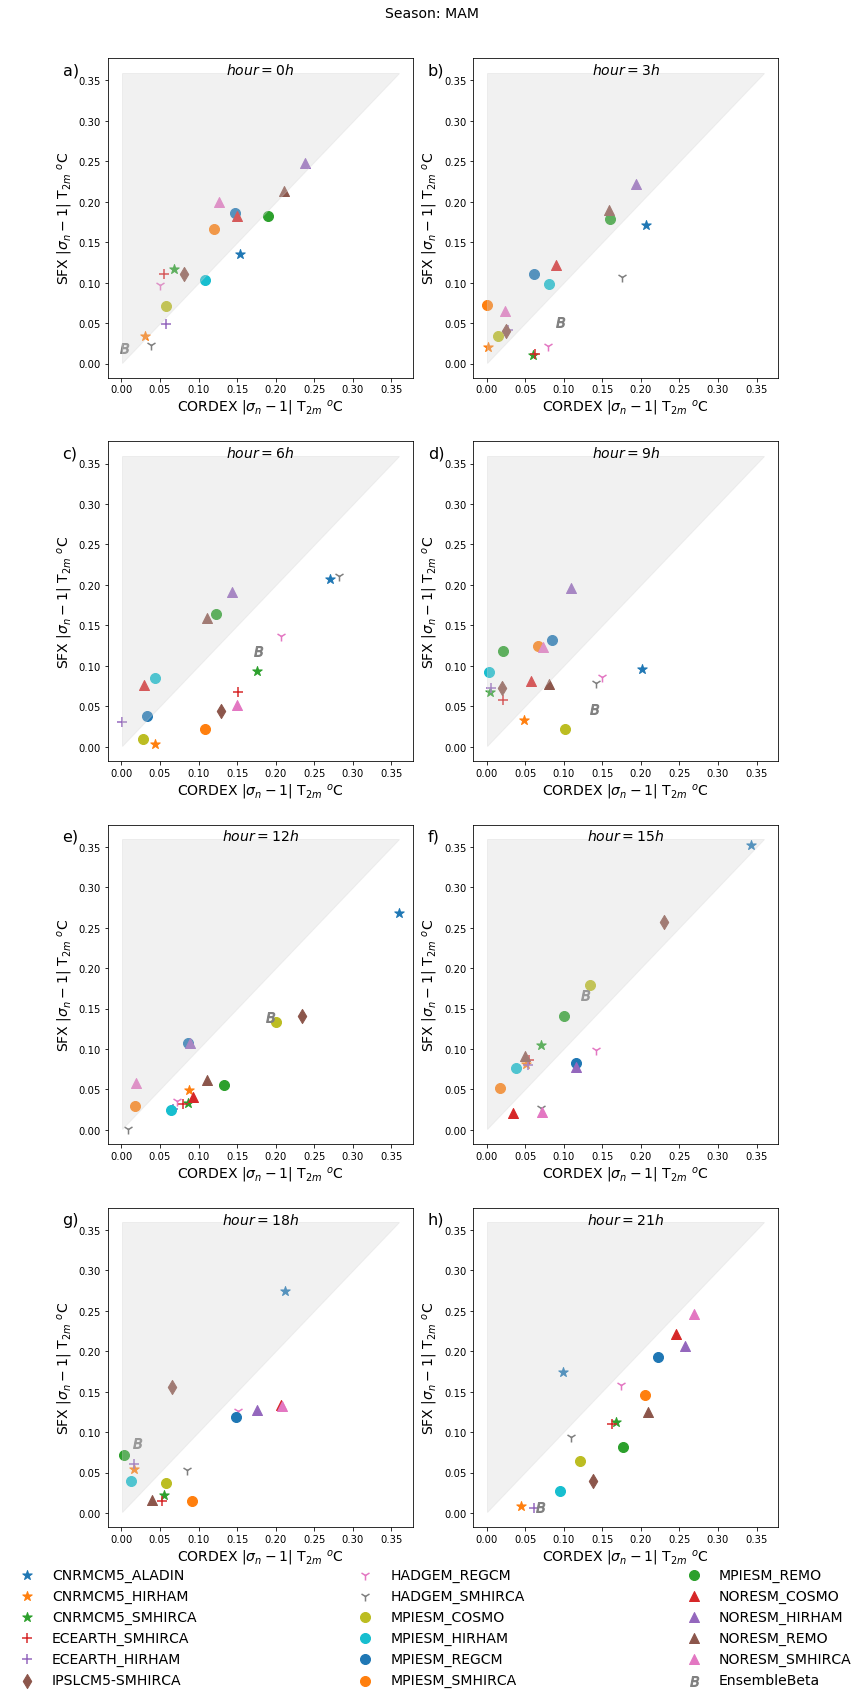

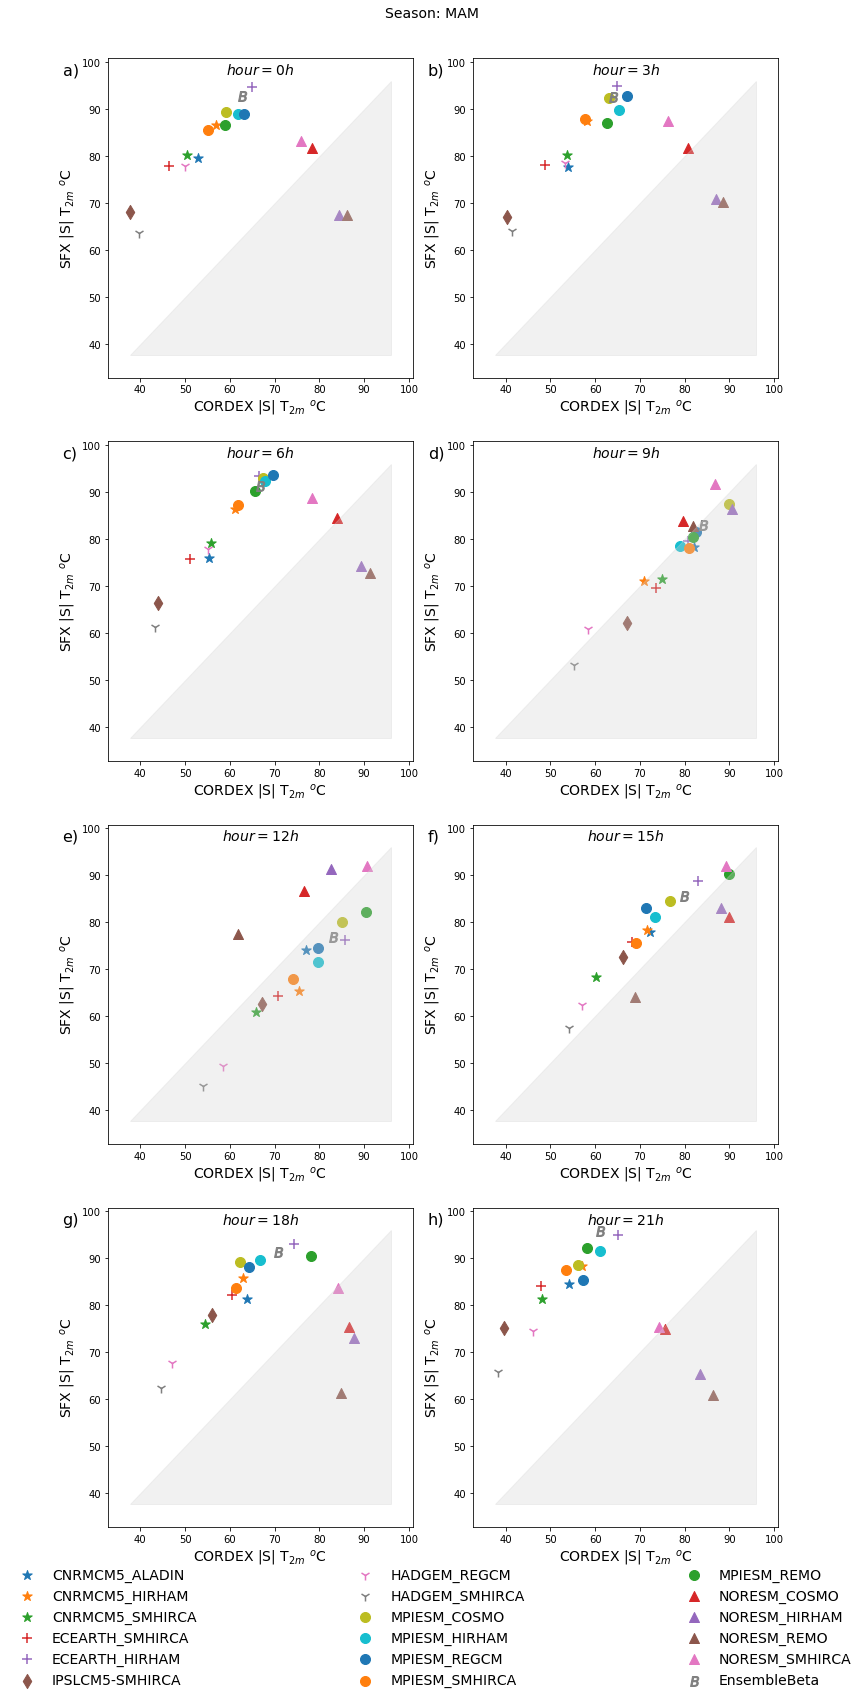

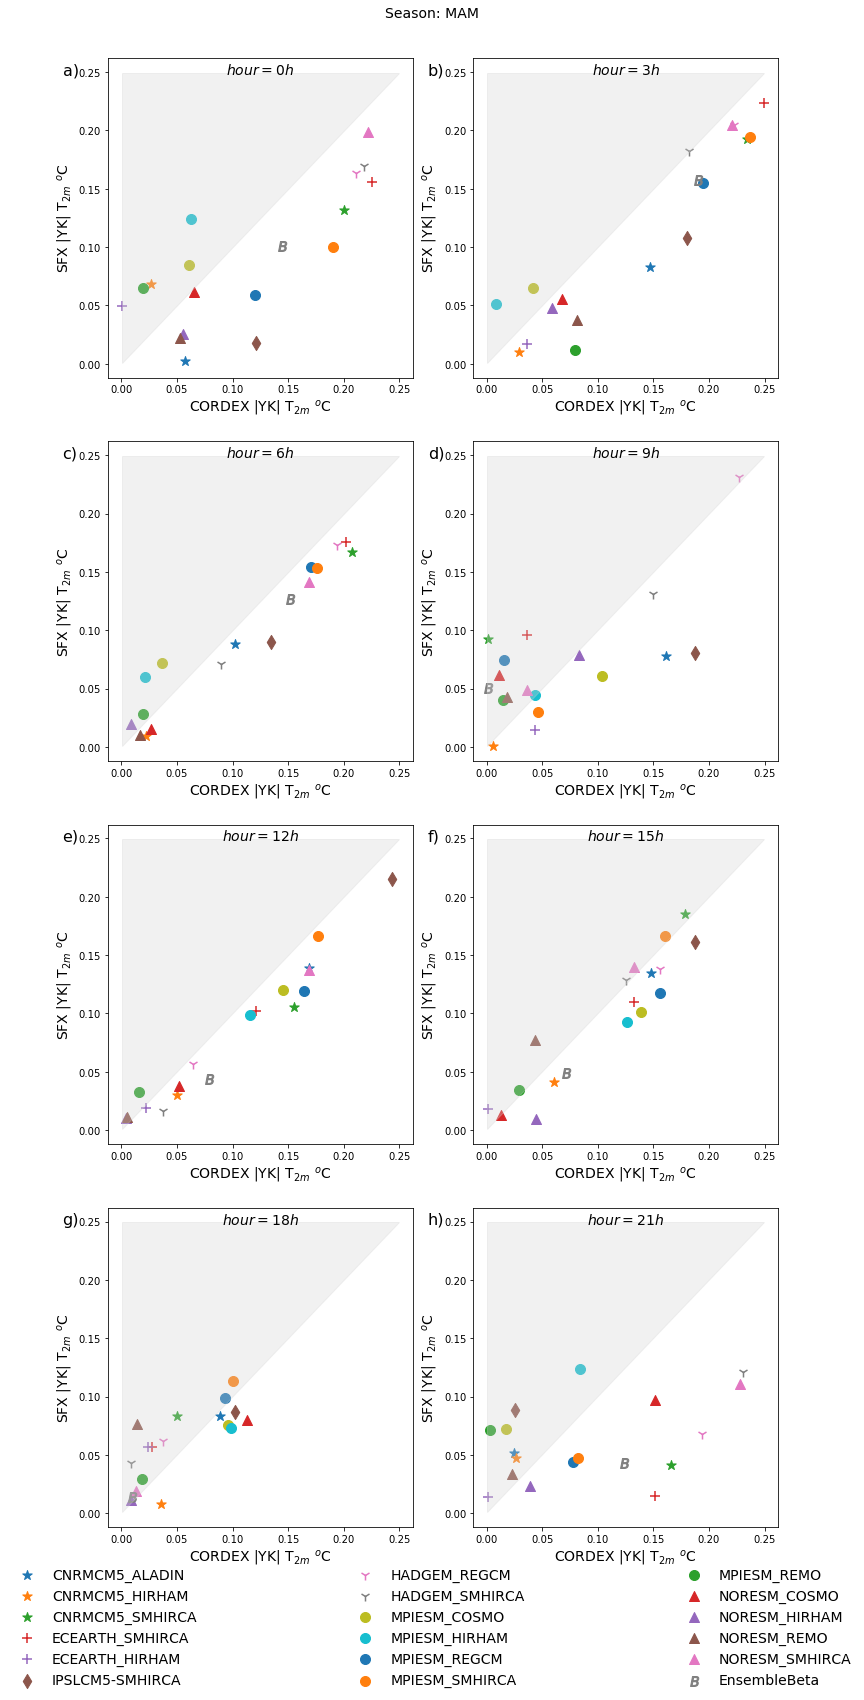

In [9]:
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_cdx_all_met_ensB_mam = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_mam.csv', 'MAM',
                                                                     cordex_output_path, 'CORDEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))
df_sfx_all_met_ensB_mam = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_mam.csv', 'MAM',
                                                                     surfex_output_path, 'SURFEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))

for metric,df_met_cdx,df_sfx_met in zip(METRIC_NAMES, df_cdx_all_met_ensB_mam, df_sfx_all_met_ensB_mam):
    plot_cmp_metric(metric, df_met_cdx, df_sfx_met, title_fig='MAM',
                out_filename='{}_cmp_w_ensBETA_mam'.format(metric), sub_folder='metric_ensemble_cmp')

### JJA

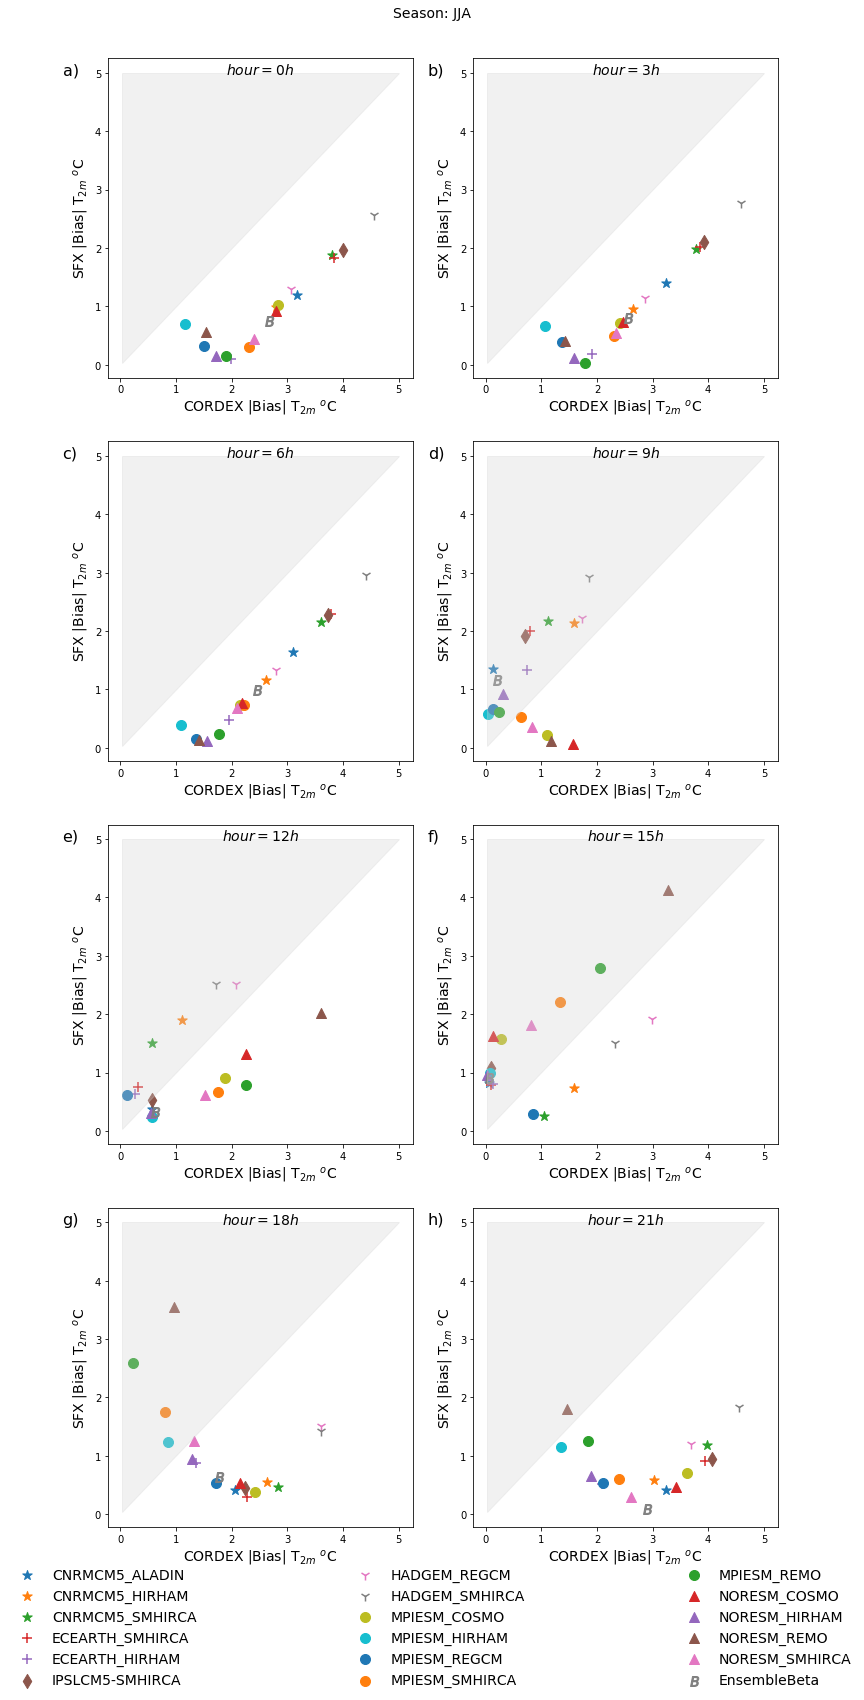

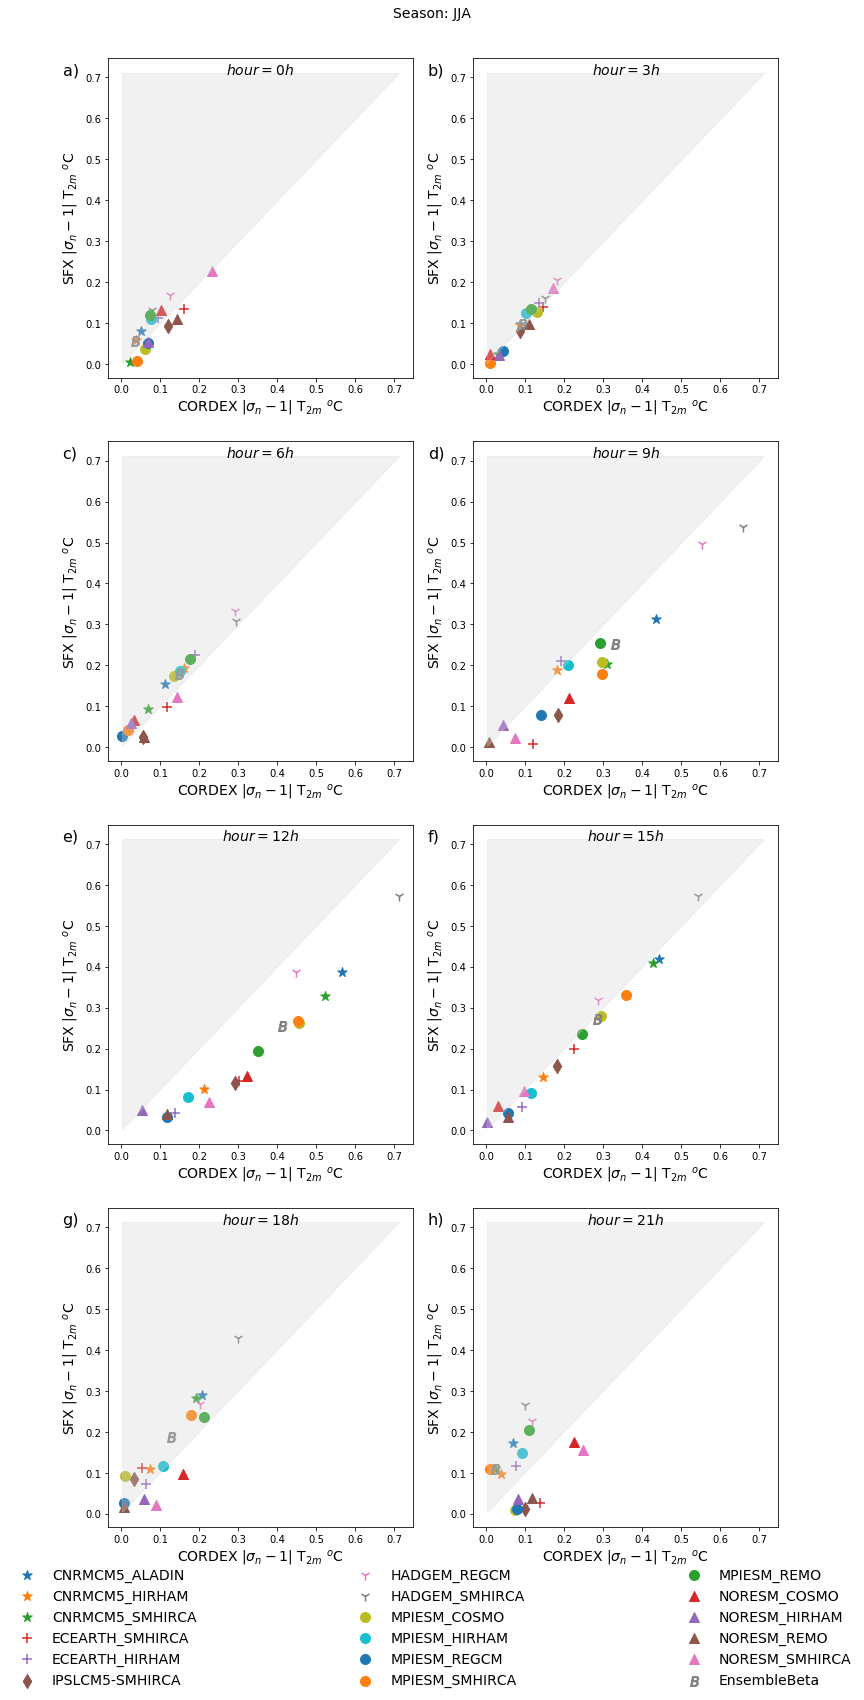

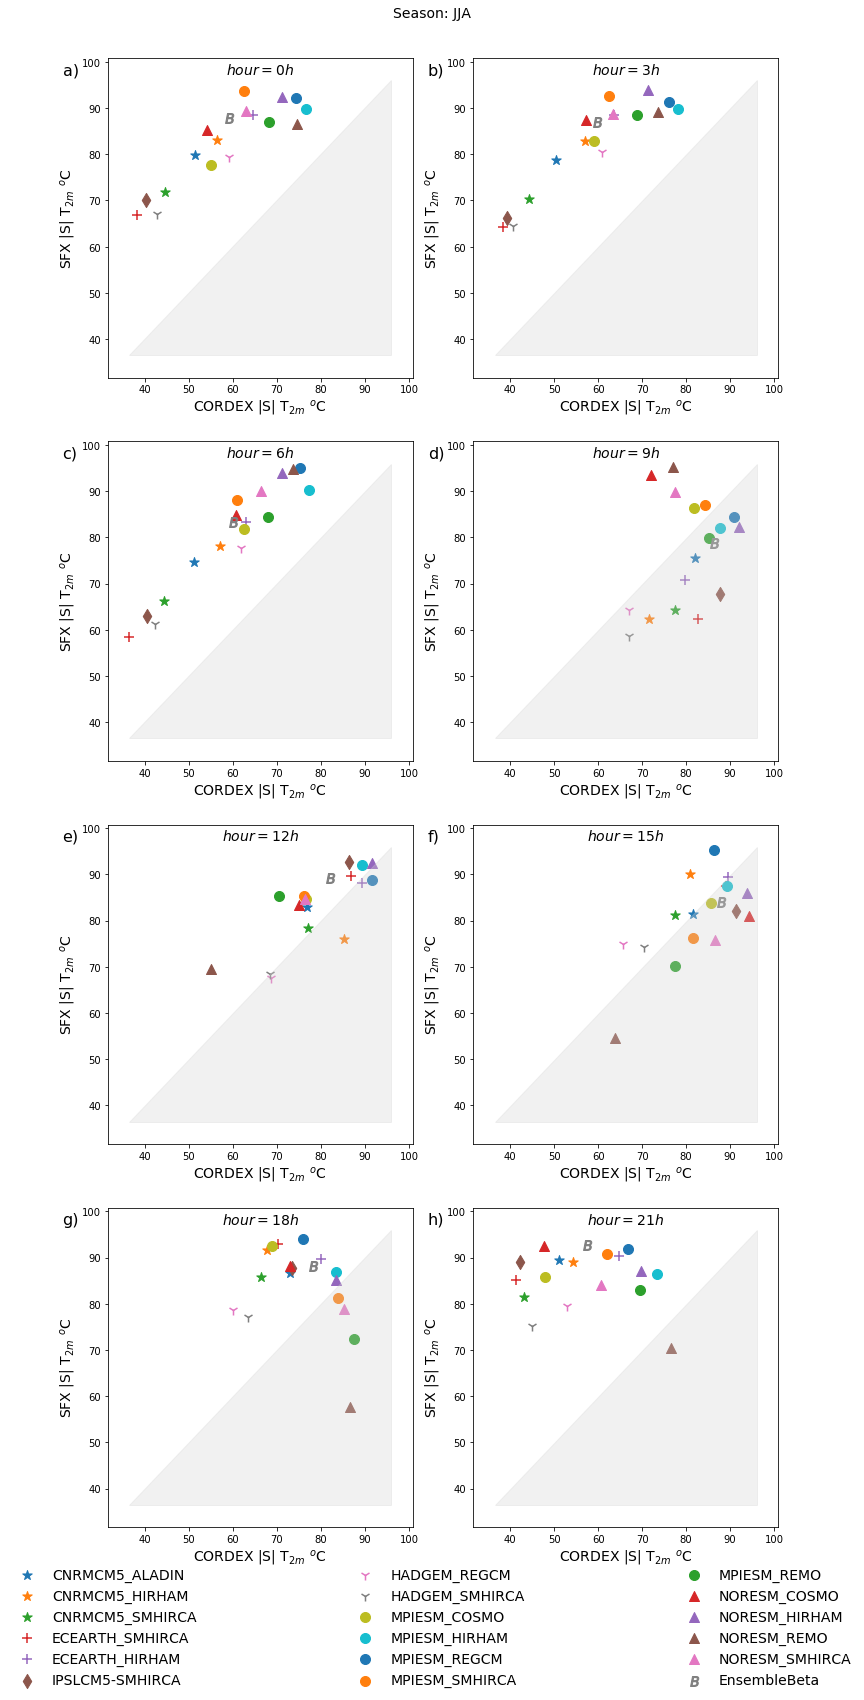

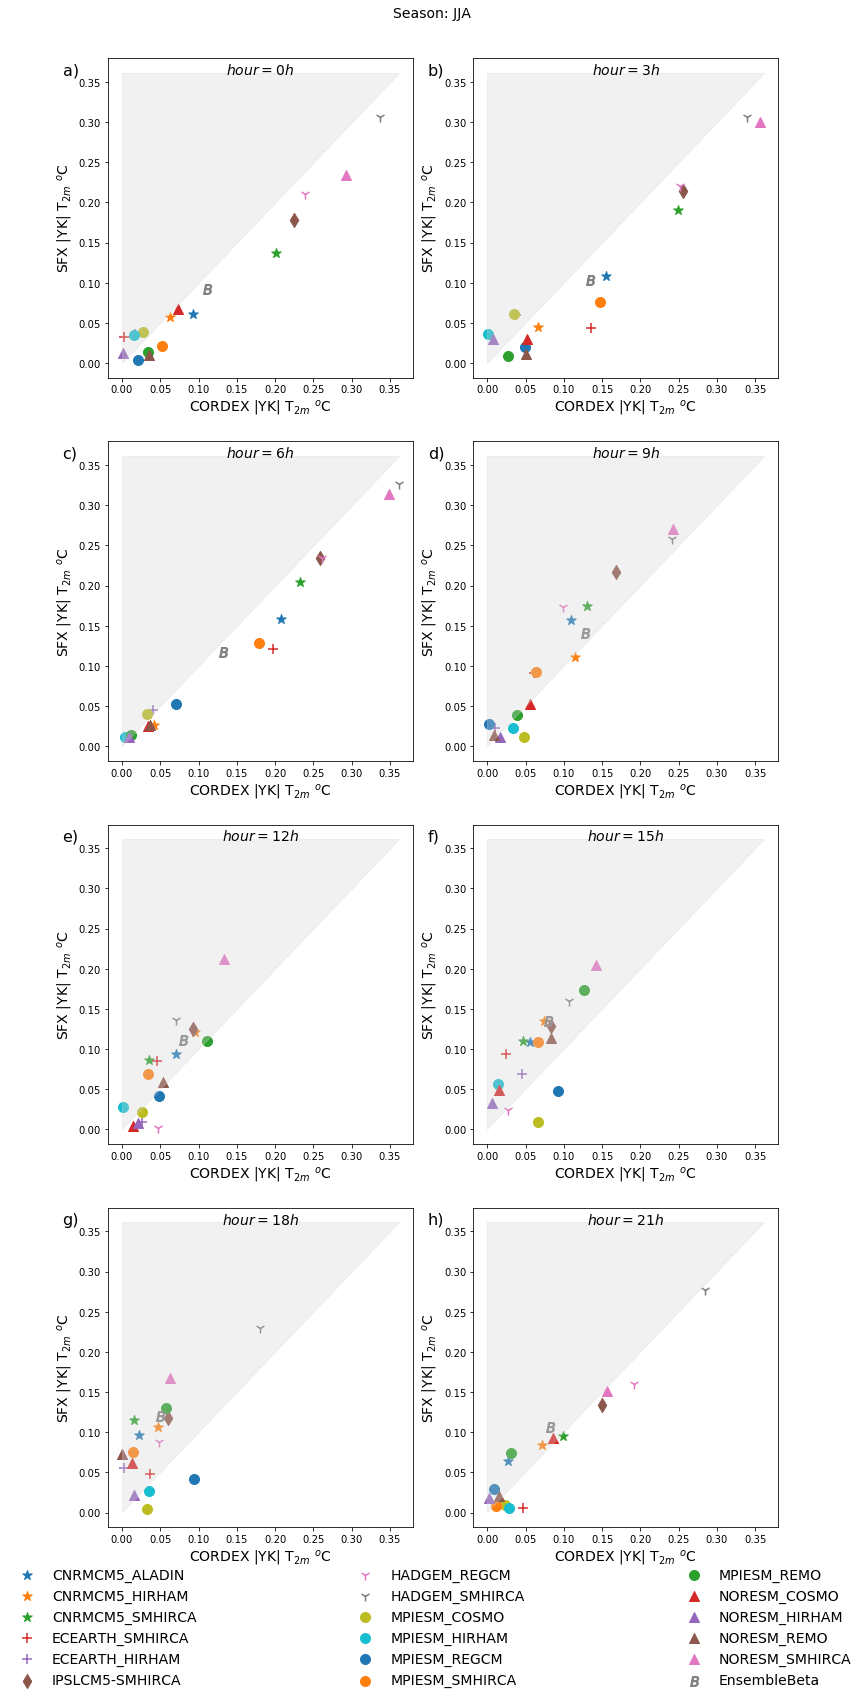

In [10]:
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_cdx_all_met_ensB_jja = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_jja.csv', 'MAM',
                                                                     cordex_output_path, 'CORDEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))
df_sfx_all_met_ensB_jja = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_jja.csv', 'MAM',
                                                                     surfex_output_path, 'SURFEX',
                                                                     models_cols, temp_obs_col, ens_beta_col,)))

for metric,df_met_cdx,df_sfx_met in zip(METRIC_NAMES, df_cdx_all_met_ensB_jja, df_sfx_all_met_ensB_jja):
    plot_cmp_metric(metric, df_met_cdx, df_sfx_met, title_fig='JJA',
                out_filename='{}_cmp_w_ensBETA_jja'.format(metric), sub_folder='metric_ensemble_cmp')

### SON

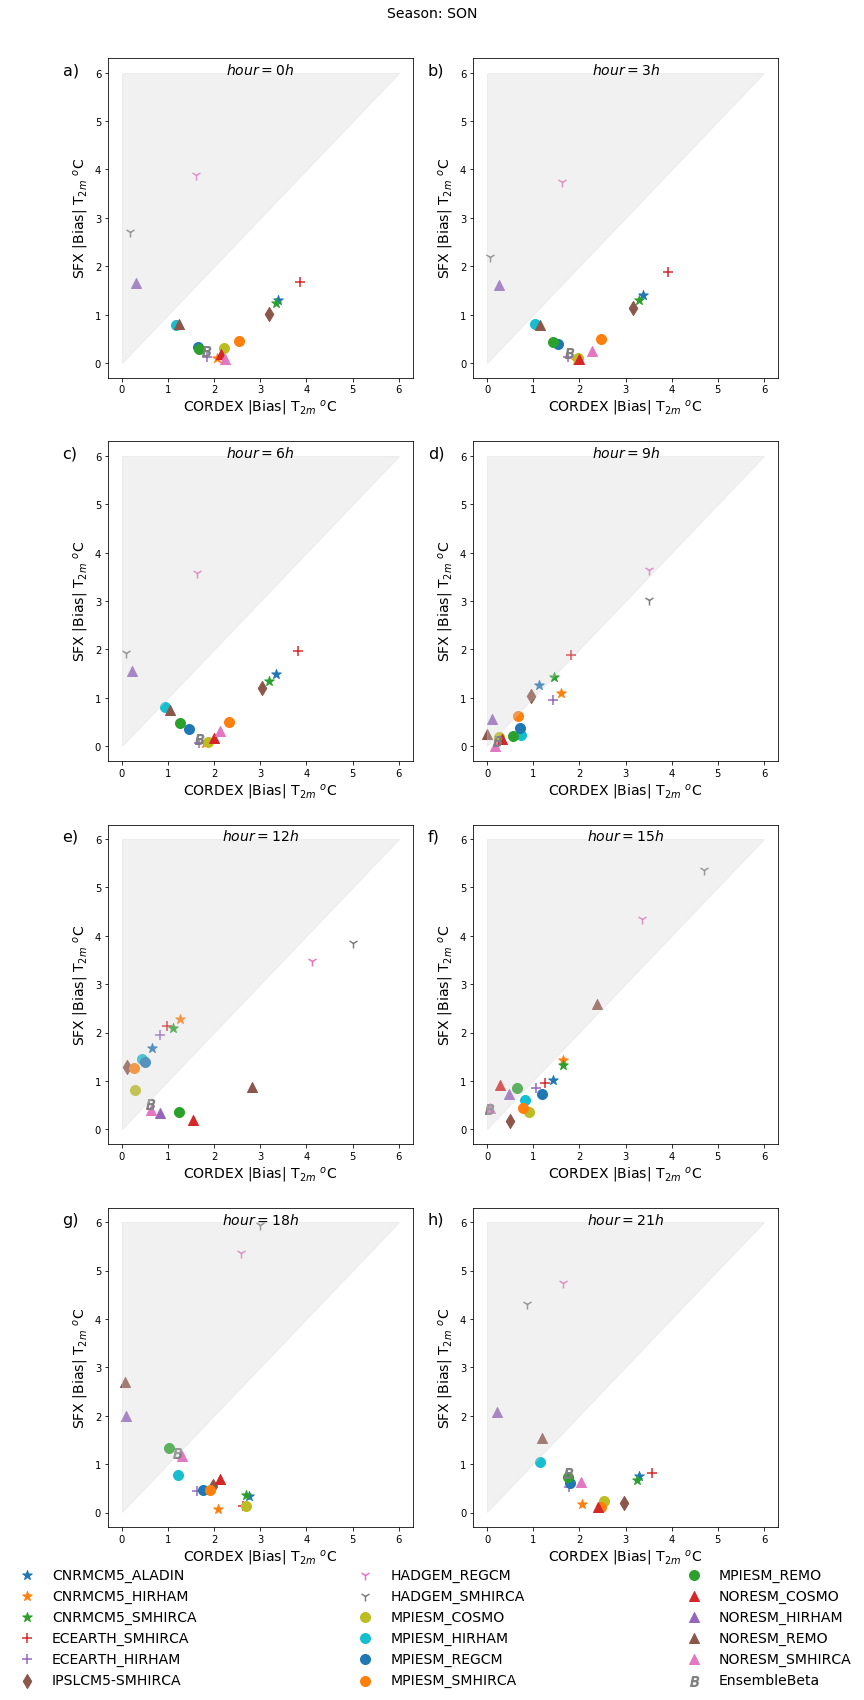

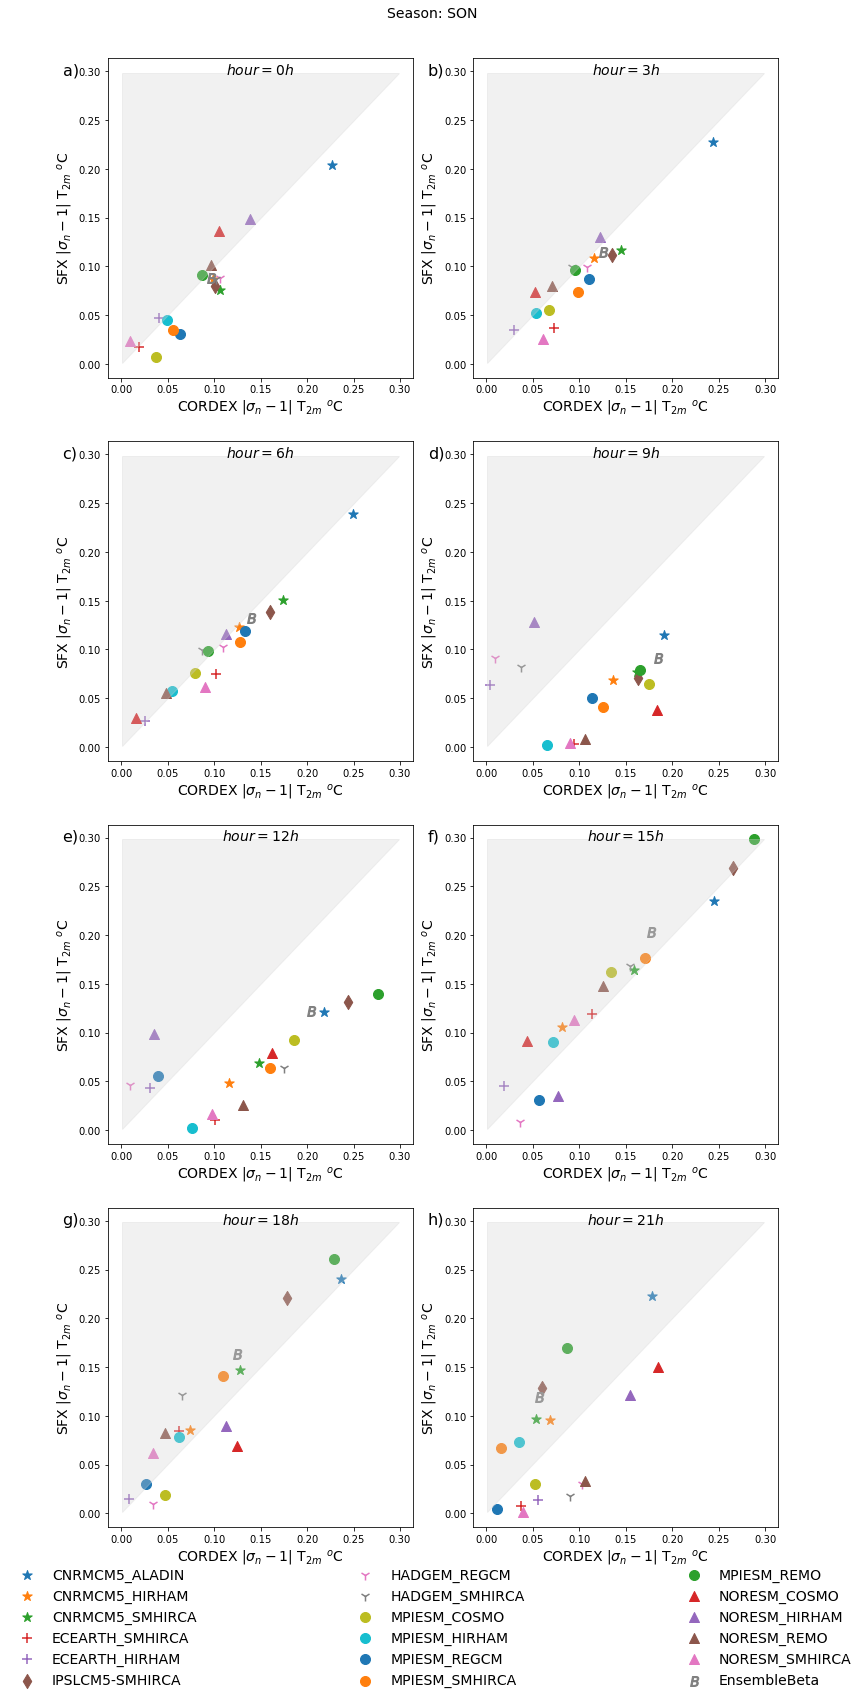

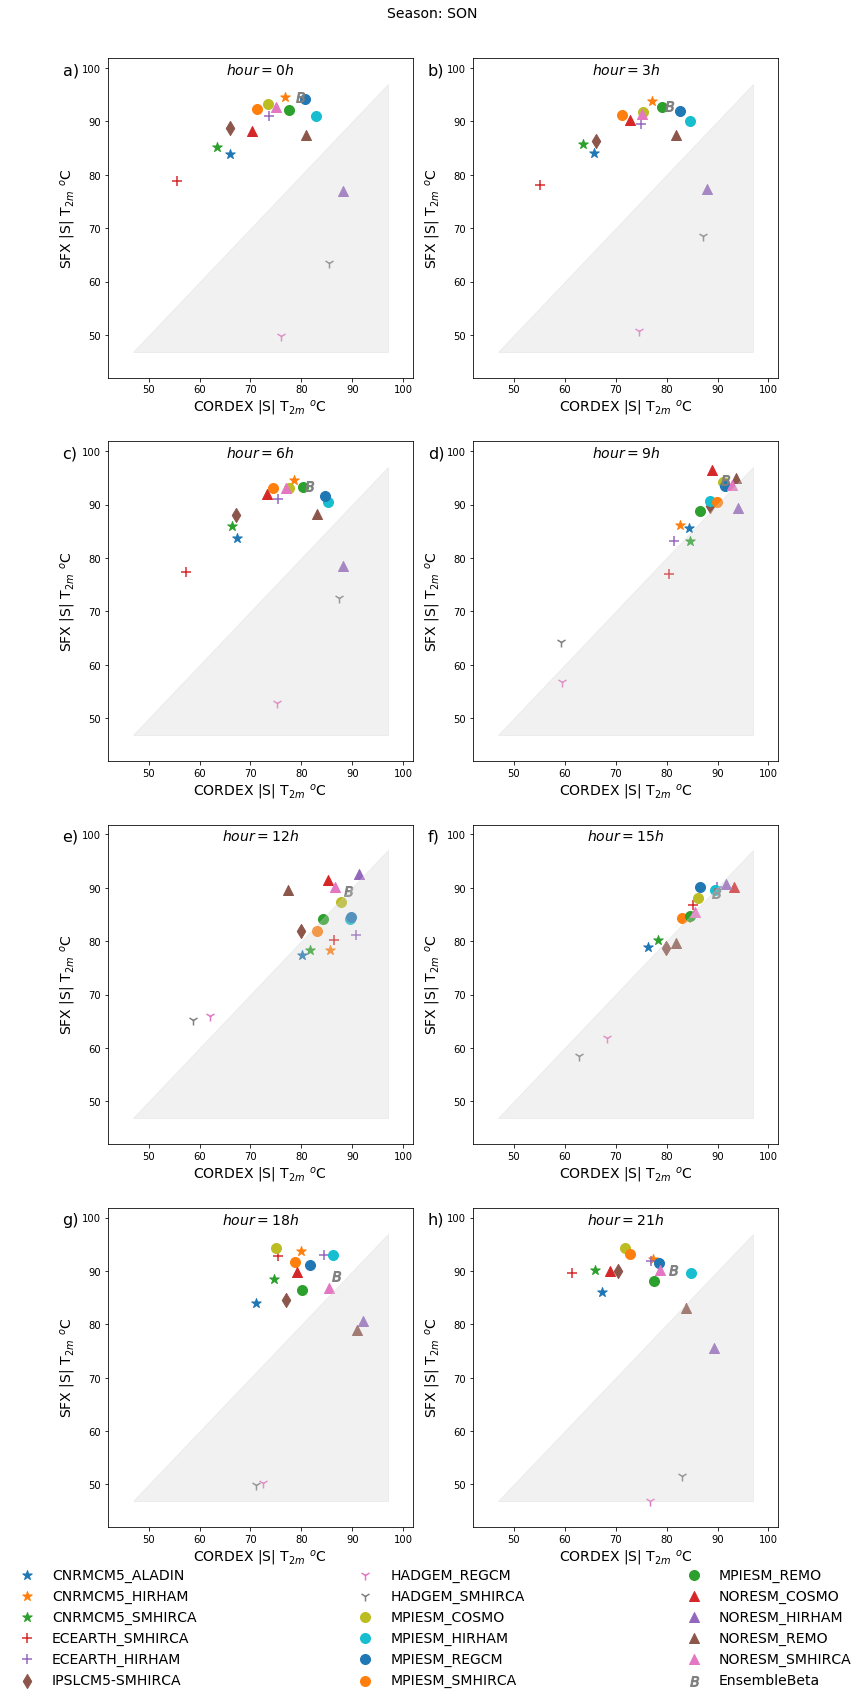

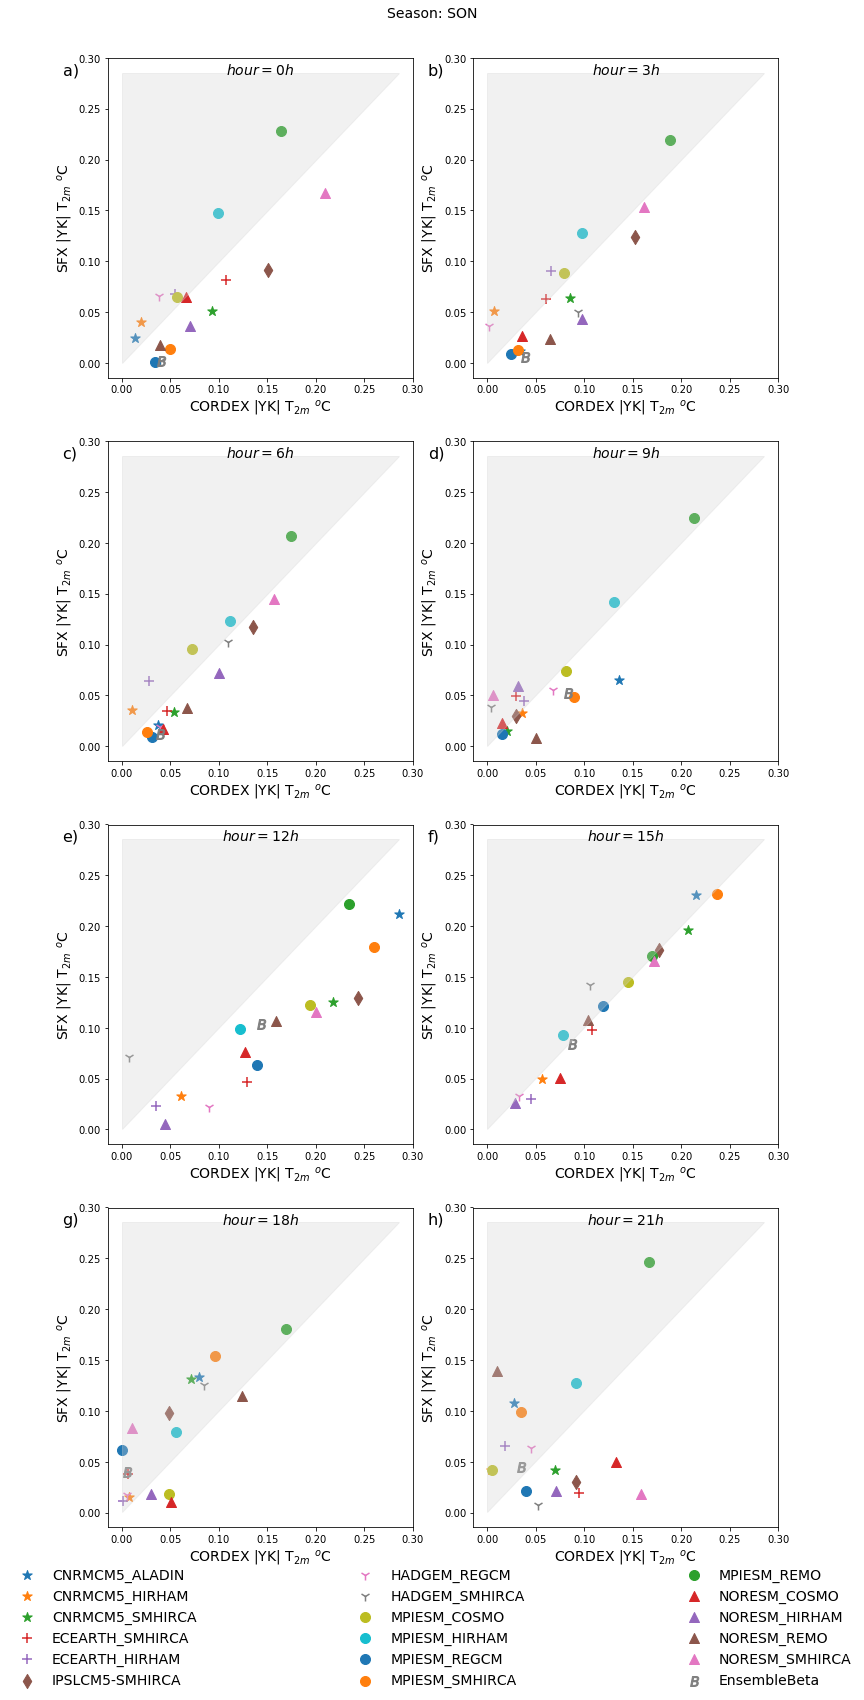

In [11]:
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_cdx_all_met_ensB_son = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_son.csv', 'SON',
                                                                     cordex_output_path, 'CORDEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))
df_sfx_all_met_ensB_son = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_son.csv', 'SON',
                                                                     surfex_output_path, 'SURFEX',
                                                                     models_cols, temp_obs_col, ens_beta_col)))

for metric,df_met_cdx,df_sfx_met in zip(METRIC_NAMES, df_cdx_all_met_ensB_son, df_sfx_all_met_ensB_son):
    plot_cmp_metric(metric, df_met_cdx, df_sfx_met, title_fig='SON',
                out_filename='{}_cmp_w_ensBETA_son'.format(metric), sub_folder='metric_ensemble_cmp')

### Compute for each model and Esemble the metrics averages for all all hours

In [12]:
df_cdx_all_met_ensB_jja[0].mean(axis=1)

0     1.947901
1     2.250713
2     2.594981
3     2.359723
4     1.302168
5     2.416466
6     2.854826
7     3.451503
8     2.086638
9     0.778241
10    1.144166
11    1.718820
12    1.508098
13    2.119448
14    1.115958
15    1.855894
16    1.738557
18    1.655876
dtype: float64

In [13]:
df_cdx_all_met_ensB_djf_avg = list(map(lambda df: df.mean(axis=1), df_cdx_all_met_ensB_djf))
df_sfx_all_met_ensB_djf_avg = list(map(lambda df: df.mean(axis=1), df_sfx_all_met_ensB_djf))

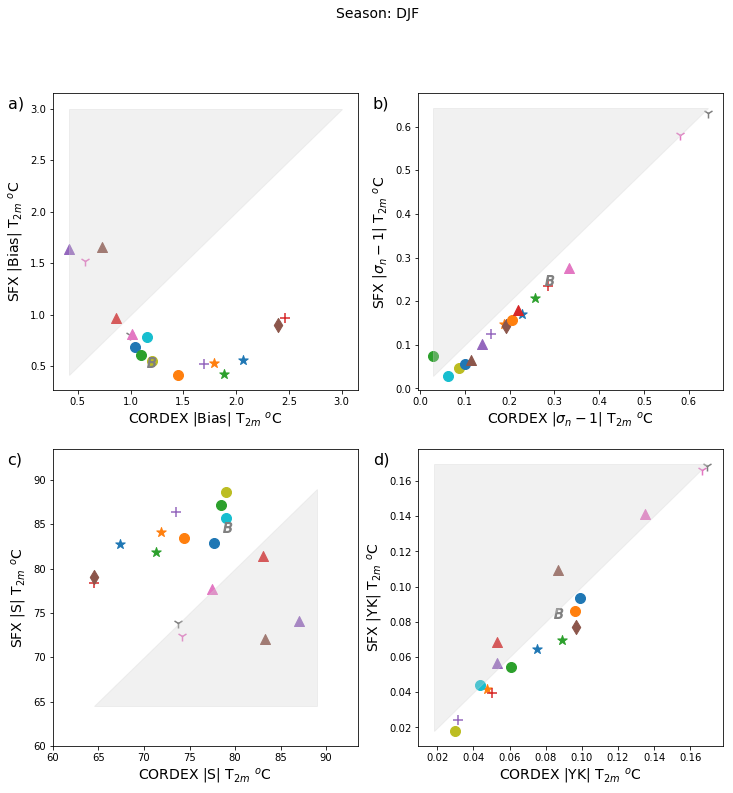

In [14]:
plot_cmp_metric_avg_h(METRIC_NAMES, df_cdx_all_met_ensB_djf_avg, df_sfx_all_met_ensB_djf_avg,
                      title_fig='DJF')

## Averages

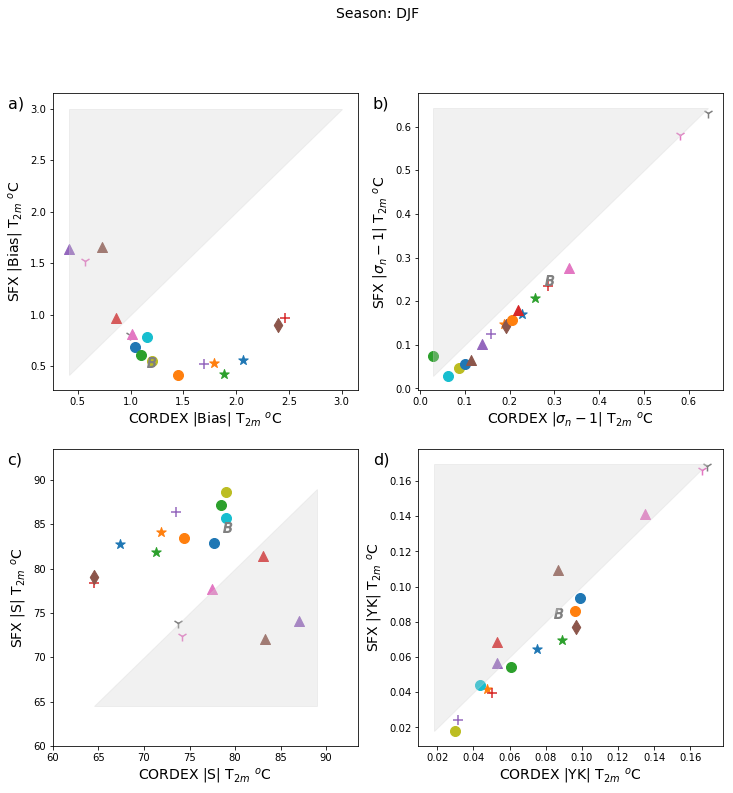

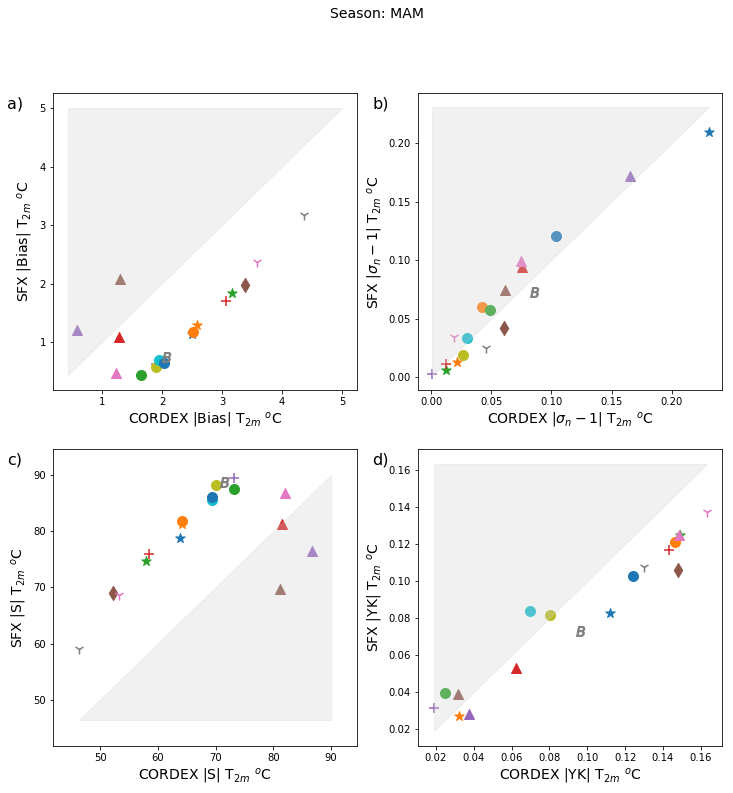

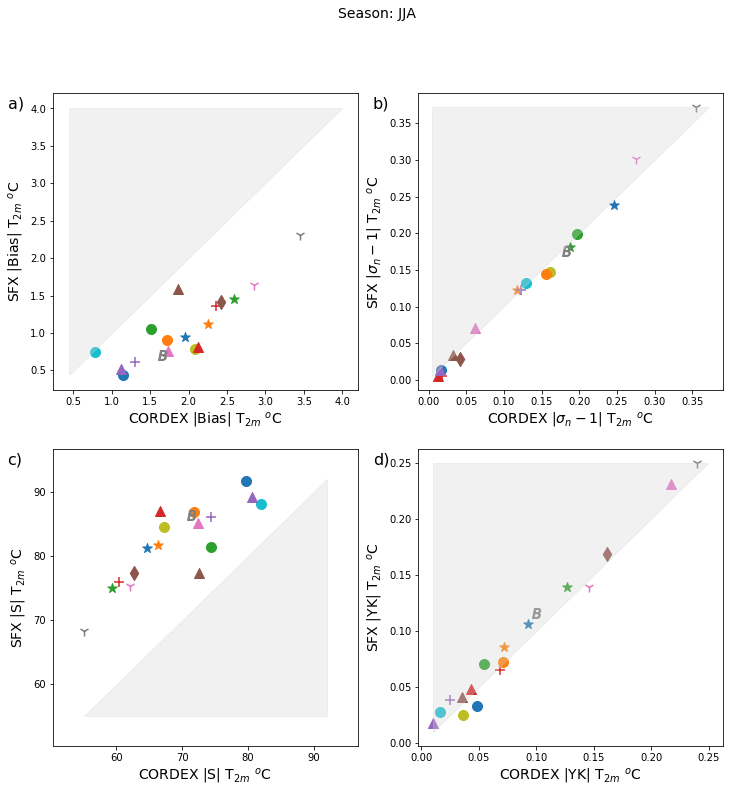

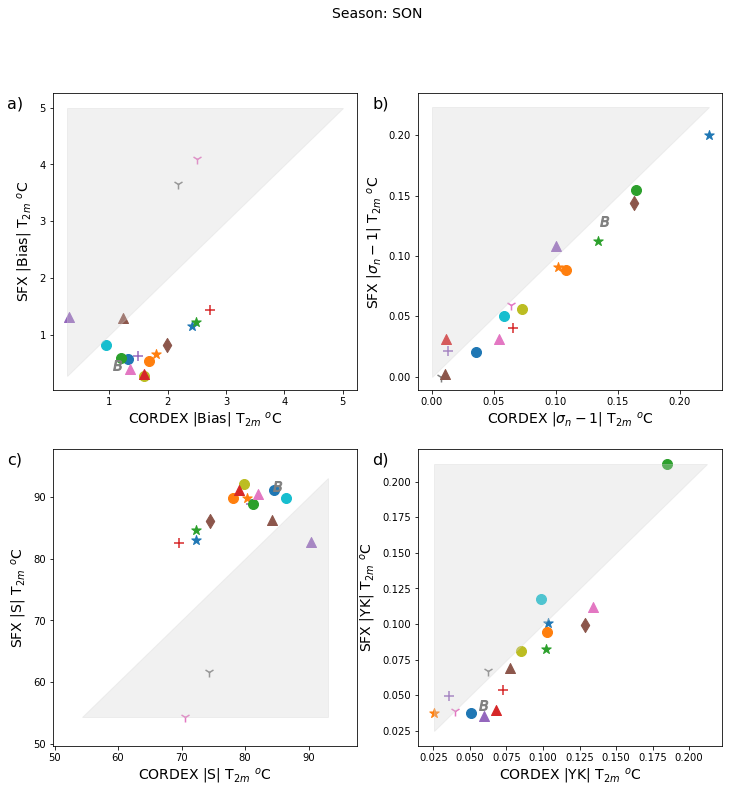

In [15]:
df_cdx_all_met_ensB = [df_cdx_all_met_ensB_djf, df_cdx_all_met_ensB_mam,
df_cdx_all_met_ensB_jja, df_cdx_all_met_ensB_son]

df_sfx_all_met_ensB = [df_sfx_all_met_ensB_djf, df_sfx_all_met_ensB_mam,
df_sfx_all_met_ensB_jja, df_sfx_all_met_ensB_son]

for season,df_met_cdx,df_sfx_met in zip(SEASONS, df_cdx_all_met_ensB, df_sfx_all_met_ensB):
    df_cdx_all_met_ensB_avg = list(map(lambda df: df.mean(axis=1), df_met_cdx))
    df_sfx_all_met_ensB_avg = list(map(lambda df: df.mean(axis=1), df_sfx_met))
    
    plot_cmp_metric_avg_h(METRIC_NAMES, df_cdx_all_met_ensB_avg, df_sfx_all_met_ensB_avg,
                          title_fig='{}'.format(season.upper()),
                          out_filename='avg_h_cmp_w_ensBETA_{}'.format(season),
                          sub_folder='metric_ensemble_cmp_avg')

## ALL data together

In [16]:
from itertools import chain

# aggregate all data
# [(bias_djf, bias_mam,...,bias_son),(sigma_djf,....,(yk_djf,..yk_son)]
# [bias_djf, bias_mam,...,bias_son,sigma_djf,....,yk_djf,..yk_son]
df_cdx = list(chain(*zip(df_cdx_all_met_ensB_djf, df_cdx_all_met_ensB_mam,
        df_cdx_all_met_ensB_jja,  df_cdx_all_met_ensB_son)))

df_sfx = list(chain(*zip(df_sfx_all_met_ensB_djf, df_sfx_all_met_ensB_mam,
        df_sfx_all_met_ensB_jja,  df_sfx_all_met_ensB_son)))

### Construct a func to prepare all data for the 4x4
* plot_cmp_metric_seasons_h_ensembles()

#### 1st - aggregation step

In [17]:
### CORDEX ###
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_cdx_djf = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_djf.csv', 'DJF',
                                                        cordex_output_path, 'CORDEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_cdx_mam = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_mam.csv', 'MAM',
                                                        cordex_output_path, 'CORDEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_cdx_jja = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_jja.csv', 'MAM',
                                                        cordex_output_path, 'CORDEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_cdx_son = list(map(abs, metrics_models_ensemblesBETA('cordex_join_obs_son.csv', 'SON',
                                                        cordex_output_path, 'CORDEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))

# aggregate all data
# [(bias_djf, bias_mam,...,bias_son),(sigma_djf,....,(yk_djf,..yk_son)]
# [bias_djf, bias_mam,...,bias_son,sigma_djf,....,yk_djf,..yk_son]
df_cdx = list(chain(*zip(df_cdx_djf, df_cdx_mam, df_cdx_jja, df_cdx_son)))

### SURFEX ###
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
df_sfx_djf = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_djf.csv', 'DJF',
                                                        surfex_output_path, 'SURFEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_sfx_mam = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_mam.csv', 'MAM',
                                                        surfex_output_path, 'SURFEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_sfx_jja = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_jja.csv', 'MAM',
                                                        surfex_output_path, 'SURFEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))
df_sfx_son = list(map(abs, metrics_models_ensemblesBETA('surfex_join_obs_son.csv', 'SON',
                                                        surfex_output_path, 'SURFEX',
                                                        models_cols, temp_obs_col, ens_beta_col)))

# aggregate all data
# [(bias_djf, bias_mam,...,bias_son),(sigma_djf,....,(yk_djf,..yk_son)]
# [bias_djf, bias_mam,...,bias_son,sigma_djf,....,yk_djf,..yk_son]
df_sfx = list(chain(*zip(df_sfx_djf, df_sfx_mam, df_sfx_jja, df_sfx_son)))

#### 2nd -  aggregation step

In [18]:
seasons_list = list(SEASONS)
func = metrics_models_ensemblesBETA

# CORDEX
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
cdx_files = ['cordex_join_obs_djf.csv', 'cordex_join_obs_mam.csv', 
             'cordex_join_obs_jja.csv', 'cordex_join_obs_son.csv']

cdx_all_sea_all_met = []
for file,sea in zip(cdx_files, seasons_list):
    cdx = map(abs, func(file, sea, cordex_output_path, 'CORDEX', models_cols, temp_obs_col, ens_beta_col))
    cdx_all_sea_all_met.append(cdx)
    
# SURFEX
# for each season get all abs(metrics)
# [bias_djf, sigma_djf, perkins_djf, yk_djf]
sfx_files = ['surfex_join_obs_djf.csv', 'surfex_join_obs_mam.csv', 
             'surfex_join_obs_jja.csv', 'surfex_join_obs_son.csv']

sfx_all_sea_all_met = []
for file,sea in zip(sfx_files, seasons_list):
    sfx = map(abs, func(file, sea, surfex_output_path, 'SURFEX', models_cols, temp_obs_col, ens_beta_col))
    sfx_all_sea_all_met.append(sfx)
    
len(cdx_all_sea_all_met), len(sfx_all_sea_all_met)


# aggregate all data
# [(bias_djf, bias_mam,...,bias_son),(sigma_djf,....,(yk_djf,..yk_son)]
# [bias_djf, bias_mam,...,bias_son,sigma_djf,....,yk_djf,..yk_son]
df_cdx = list(chain(*zip(*cdx_all_sea_all_met)))
df_sfx = list(chain(*zip(*sfx_all_sea_all_met)))

len(df_cdx), len(df_sfx)

(16, 16)

#### 3rd -  aggregation step -  final function
* prepare_data_4x4

In [19]:
# def prepare_data_4x4(metrics_function, lst_data_files, input_path, model_family, models_columns, obs_columns, ensemble_column):
#     from itertools import chain
    
#     seasons_list = list(SEASONS)
#     all_sea_all_met = []
#     for file,sea in zip(lst_data_files, seasons_list):
#         lst_df = map(abs, metrics_function(file, sea, input_path, model_family, models_columns, obs_columns, ensemble_column))
#         all_sea_all_met.append(lst_df)
#     return chain(*zip(*all_sea_all_met))   

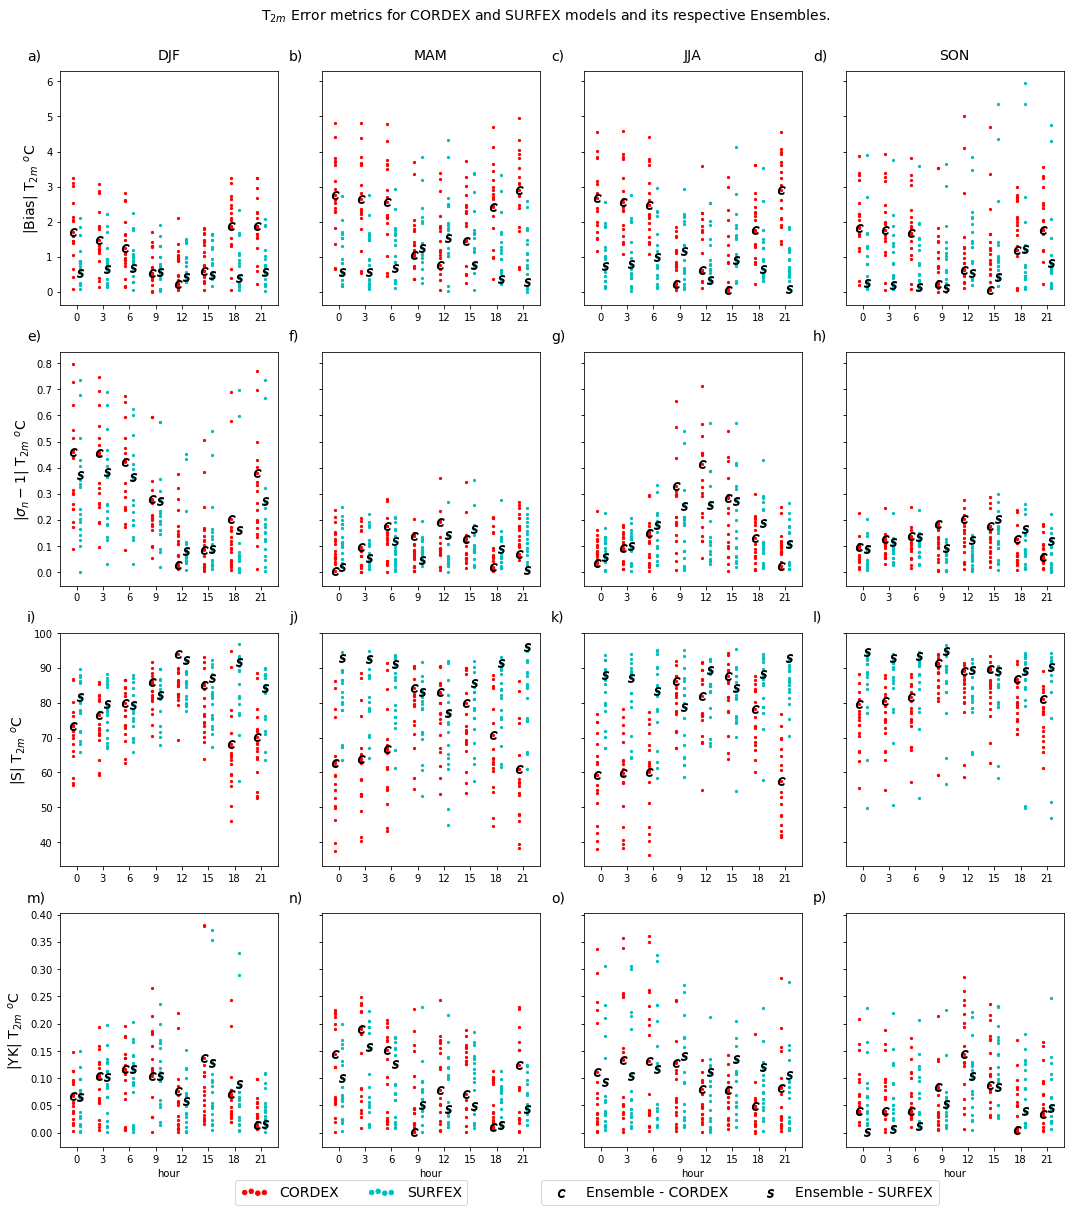

In [20]:
cdx_files = ['cordex_join_obs_djf.csv', 'cordex_join_obs_mam.csv', 
             'cordex_join_obs_jja.csv', 'cordex_join_obs_son.csv']
sfx_files = ['surfex_join_obs_djf.csv', 'surfex_join_obs_mam.csv', 
             'surfex_join_obs_jja.csv', 'surfex_join_obs_son.csv']

df_cdx = prepare_data_4x4(metrics_models_ensemblesBETA, cdx_files, cordex_output_path, 'CORDEX', models_cols, temp_obs_col, ens_beta_col)
df_sfx = prepare_data_4x4(metrics_models_ensemblesBETA, sfx_files, surfex_output_path, 'SURFEX', models_cols, temp_obs_col, ens_beta_col)

plot_cmp_metric_seasons_h_ensembles(df_cdx, df_sfx, ens_beta_col,
                                    title_fig=None, out_filename='all_data_4x4_ensBETA',
                                    out_dir=plots_output_path, sub_folder='metric_ensemble_cmp' )

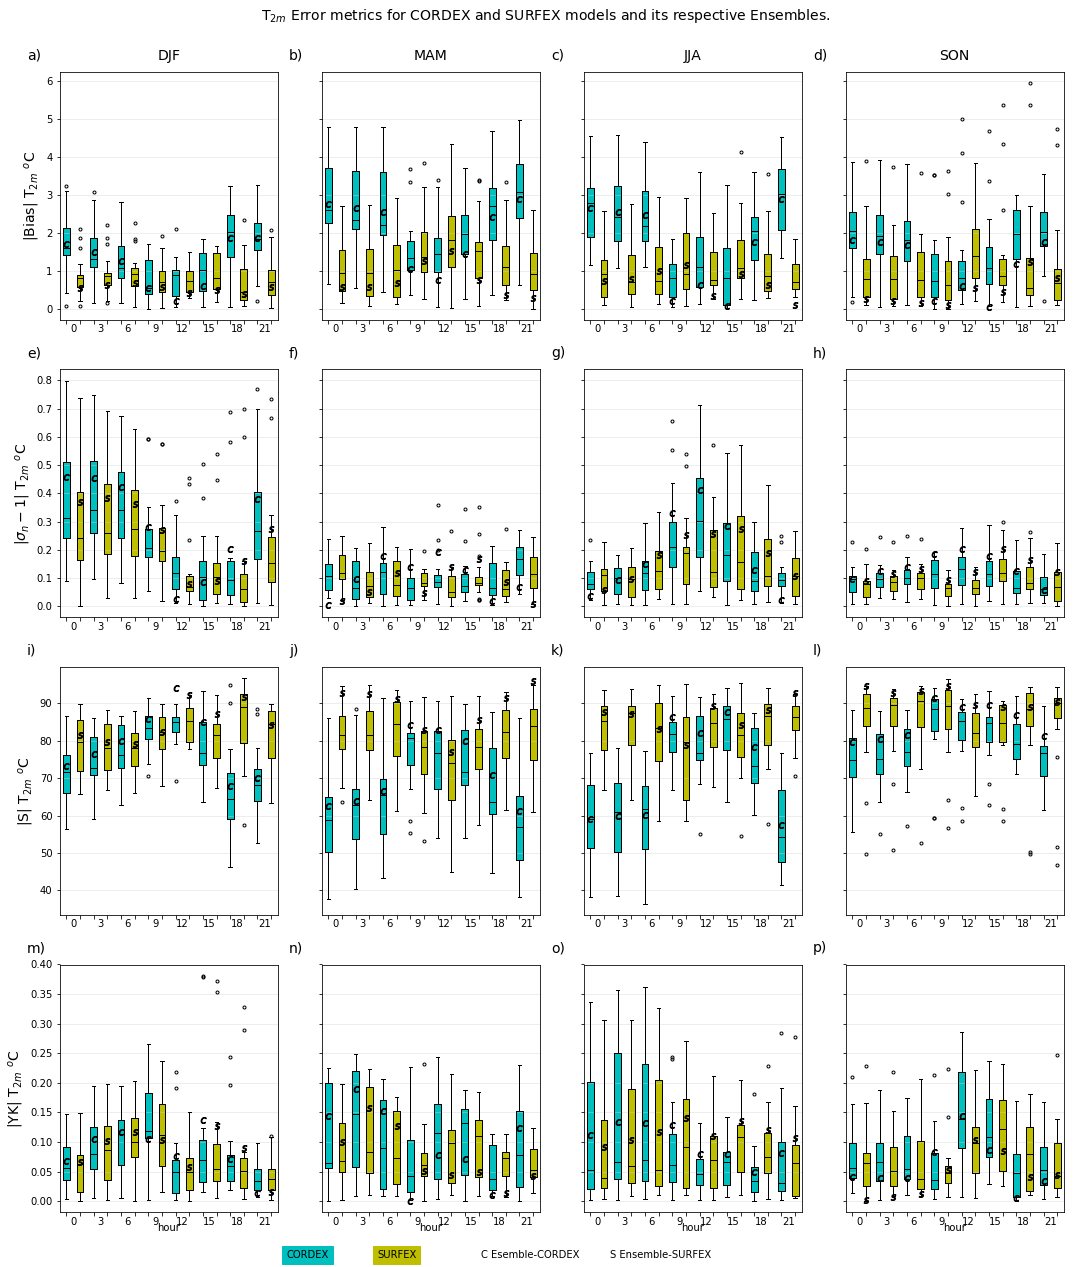

In [21]:
cdx_files = ['cordex_join_obs_djf.csv', 'cordex_join_obs_mam.csv', 
             'cordex_join_obs_jja.csv', 'cordex_join_obs_son.csv']
sfx_files = ['surfex_join_obs_djf.csv', 'surfex_join_obs_mam.csv', 
             'surfex_join_obs_jja.csv', 'surfex_join_obs_son.csv']

df_cdx = prepare_data_4x4(metrics_models_ensemblesBETA, 
                          cdx_files, cordex_output_path, 'CORDEX', 
                          models_cols, temp_obs_col, ens_beta_col)
df_sfx = prepare_data_4x4(metrics_models_ensemblesBETA, 
                          sfx_files, surfex_output_path, 'SURFEX', 
                          models_cols, temp_obs_col, ens_beta_col)

boxplot_cmp_metric_seasons_h_ensembles(
    df_cdx, df_sfx, ens_beta_col, title_fig=None,
    out_filename='box_all_data_4x4_ensBETA',
    out_dir=plots_output_path, sub_folder='metric_ensemble_cmp' )